In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [2]:
titanic_data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### 1- Explore Data

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Disply statistical items.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#null iterms
null=titanic_data.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

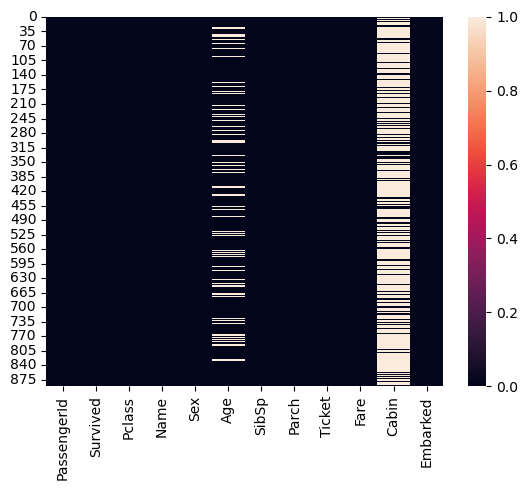

In [9]:
sns.heatmap(titanic_data.isnull())

### 2- Cleaning Data

In [10]:
def clean(df):
    df.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
    df.Age=df.Age.fillna(df.Age.median())
    df.dropna()
    return df

In [11]:
clean(titanic_data)
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

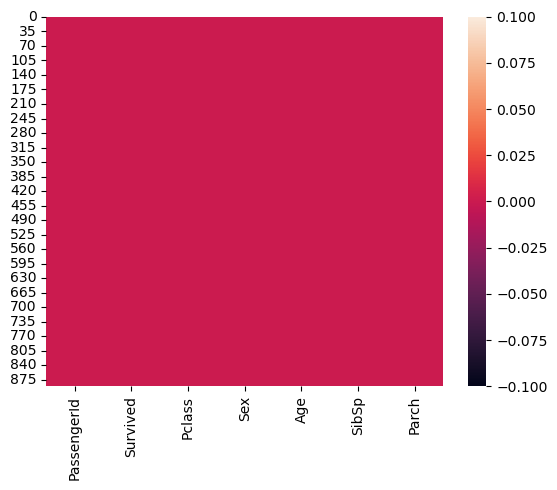

In [12]:
sns.heatmap(titanic_data.isnull())

### 3- Data Analysis

In [ ]:
#correlation
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.2f',linewidth=.5)

In [1]:
titanic_data.Survived.value_counts()

NameError: name 'titanic_data' is not defined

<Axes: ylabel='Sex'>

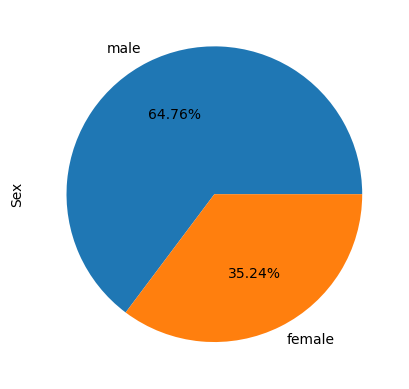

In [15]:
# perc between male & fema
titanic_data.Sex.value_counts().plot.pie(autopct = "%0.2f%%") 

<Axes: xlabel='Sex', ylabel='count'>

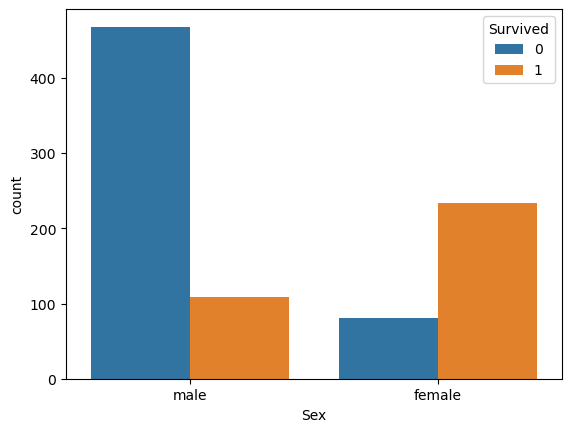

In [16]:
# ٍSurvived from male and femal
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

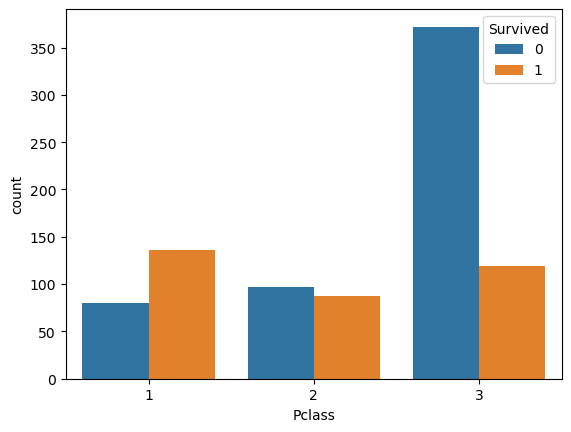

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

<Axes: xlabel='Age', ylabel='Count'>

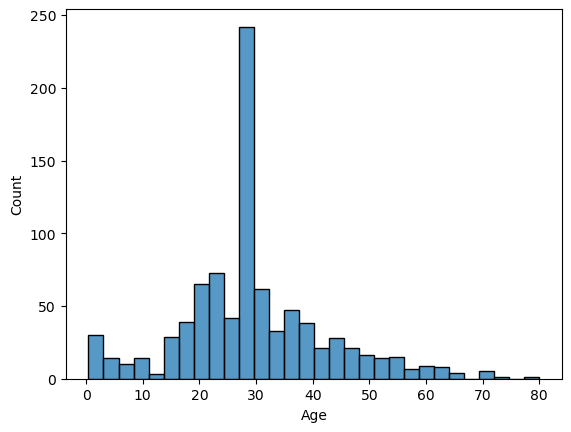

In [18]:
# Show the Deffirent Ages of passengers
sns.histplot(titanic_data.Age)

### 4- Processing Data

In [19]:
titanic_data.Sex=pd.get_dummies(titanic_data.Sex,drop_first=True)
test.Sex=pd.get_dummies(test.Sex,drop_first=True)

In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


### 5- Creat model

In [21]:
x=titanic_data.drop(['Survived'],axis=1)
y=titanic_data.Survived

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.8)

In [23]:
accuracies=[]

In [24]:
def all(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    print('Accuracy is : ',accuracy)
    accuracies.append(accuracy)

In [25]:
model1=LogisticRegression()
all(model1)

Accuracy is :  0.7769985974754559


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model2=RandomForestClassifier()
all(model2)

Accuracy is :  0.7391304347826086


In [27]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy is :  0.7433380084151473


In [28]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy is :  0.6788218793828892


In [29]:
model5= KNeighborsClassifier()
all(model5)

Accuracy is :  0.5371669004207573


In [30]:
model6=GaussianNB()
all(model6)

Accuracy is :  0.7798036465638148


In [31]:
model7=SVC()
all(model7)

Accuracy is :  0.6227208976157083


In [32]:
Algorithm=['LogisticRegression','RandomForestClassifier',
           'GradientBoostingClassifier','DecisionTreeClassifier',
           'KNeighborsClassifier','GaussianNB','SVC']

In [33]:
new=pd.DataFrame({'Algorithm':Algorithm,'Score':accuracies})
new

,Algorithm,Score
0,LogisticRegression,0.776999
1,RandomForestClassifier,0.739130
2,GradientBoostingClassifier,0.743338
3,DecisionTreeClassifier,0.678822
4,KNeighborsClassifier,0.537167
5,GaussianNB,0.779804
6,SVC,0.622721


In [34]:
# Get the row index of the maximum accuracy
max_accuracy_index = new['Score'].idxmax()

# Get the algorithm with the maximum accuracy
algorithm_with_max_accuracy = new.loc[max_accuracy_index, 'Algorithm']

print("Algorithm with max accuracy:", algorithm_with_max_accuracy)

Algorithm with max accuracy: GaussianNB


In [36]:
best_model= RandomForestClassifier()
best_model.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
predict=best_model.predict(test)

In [38]:
final=test.PassengerId

In [39]:
df=pd.DataFrame({'PassengerId':final,'Survived':predict})

In [44]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
df .to_csv('pred.csv',index=False)